In [1]:
import pandas as pd

In [2]:
vader_df = pd.read_csv("full_vader_results.csv")
movies_df = pd.read_csv("imdb_movies.csv")

In [3]:
print(vader_df.columns)
print(movies_df.columns)

Index(['review', 'sentiment', 'clean_review', 'vader_score',
       'vader_sentiment'],
      dtype='object')
Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country'],
      dtype='object')


In [11]:
movies_df.rename(columns={'names': 'title'}, inplace=True)


In [12]:
vader_df['title'] = vader_df['review'].str.extract(r'^([A-Za-z0-9 :\'\-]+)')  # crude pattern


In [13]:
vader_df['title'] = vader_df['title'].str.lower().str.strip()
movies_df['title'] = movies_df['title'].str.lower().str.strip()


In [14]:
print('title' in vader_df.columns)   
print('title' in movies_df.columns)

True
True


In [15]:
merged_df = pd.merge(movies_df, vader_df, on='title', how='inner')


In [16]:
merged_df['success'] = merged_df['revenue'] >= 1.5 * merged_df['budget_x']

In [17]:
merged_df['success'] = merged_df['success'].astype(int)

In [18]:
print(merged_df['success'].value_counts())

success
1    434
0     78
Name: count, dtype: int64


In [20]:
features = ['budget_x', 'score', 'vader_score']
target = 'revenue'


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [22]:
features = ['budget_x', 'score', 'vader_score']
target = 'success'

In [23]:
model_df = merged_df[features + [target]].dropna()

In [24]:
X = model_df[features]
y = model_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
y_pred = clf.predict(X_test)

In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8058252427184466

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.15      0.23        20
           1       0.82      0.96      0.89        83

    accuracy                           0.81       103
   macro avg       0.66      0.56      0.56       103
weighted avg       0.76      0.81      0.76       103



In [28]:
enhanced_df = merged_df[['budget_x', 'score', 'vader_score', 'genre', 'orig_lang', 'success']].dropna()


In [29]:
enhanced_df = pd.get_dummies(enhanced_df, columns=['genre', 'orig_lang'], drop_first=True)

In [30]:
X = enhanced_df.drop('success', axis=1)
y = enhanced_df['success']

In [31]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = clf.predict(X_test)

In [34]:
print("Improved Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nImproved Classification Report:\n", classification_report(y_test, y_pred))

Improved Model Accuracy: 0.8712871287128713

Improved Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.38      0.55        21
           1       0.86      1.00      0.92        80

    accuracy                           0.87       101
   macro avg       0.93      0.69      0.74       101
weighted avg       0.89      0.87      0.85       101



In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [49]:
numeric_cols = ['budget_x', 'score', 'vader_score', 'revenue']

In [50]:
plt.figure(figsize=(8,6))
corr = merged_df[numeric_cols].corr()

<Figure size 800x600 with 0 Axes>

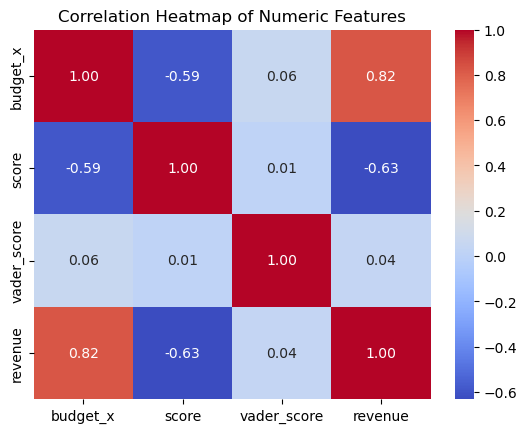

In [51]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

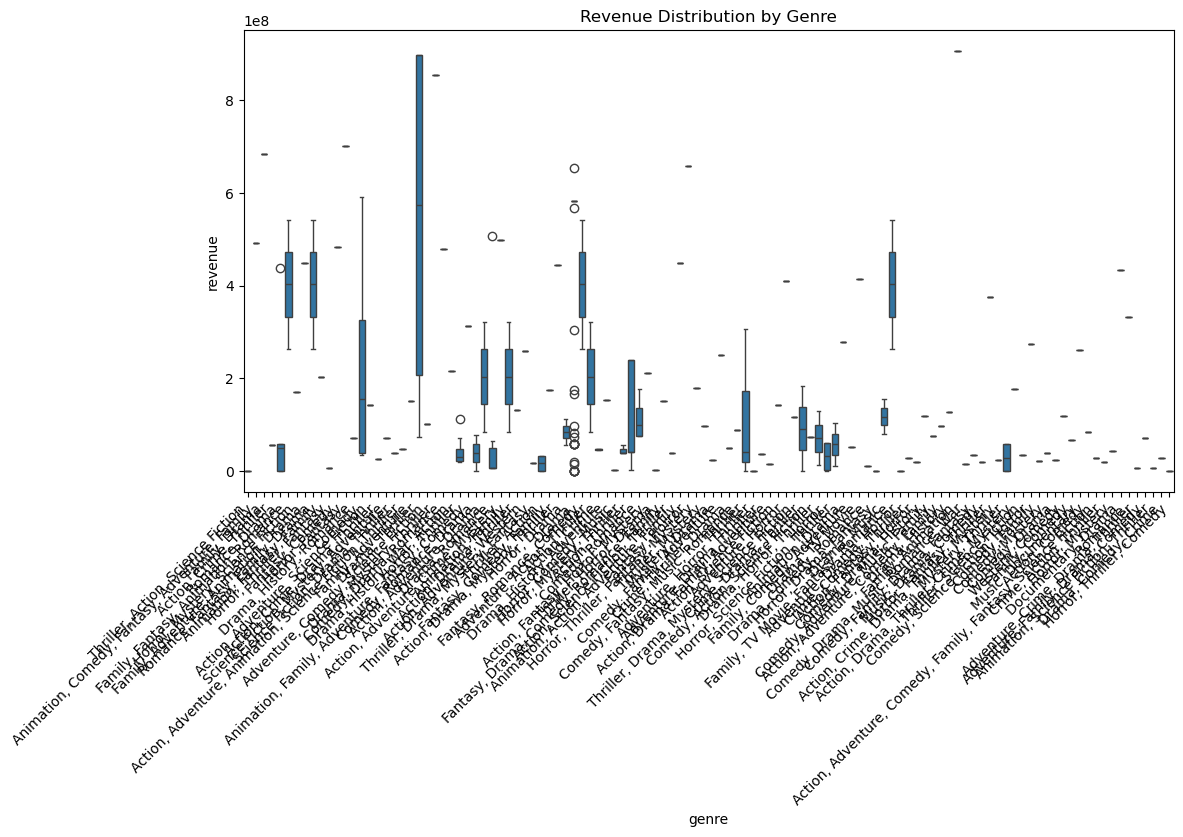

In [52]:
plt.figure(figsize=(12,6))
sns.boxplot(x='genre', y='revenue', data=merged_df)
plt.xticks(rotation=45, ha='right')
plt.title('Revenue Distribution by Genre')
plt.show()

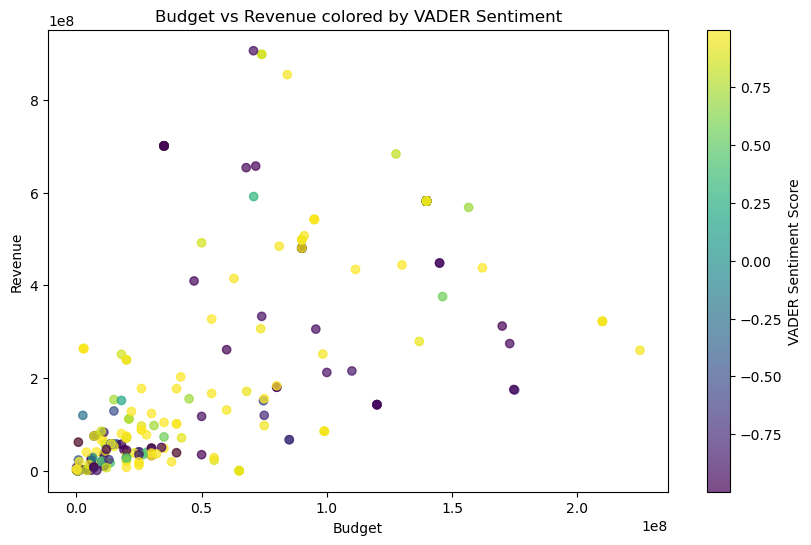

In [53]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(merged_df['budget_x'], merged_df['revenue'], 
                      c=merged_df['vader_score'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='VADER Sentiment Score')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Budget vs Revenue colored by VADER Sentiment')
plt.show()

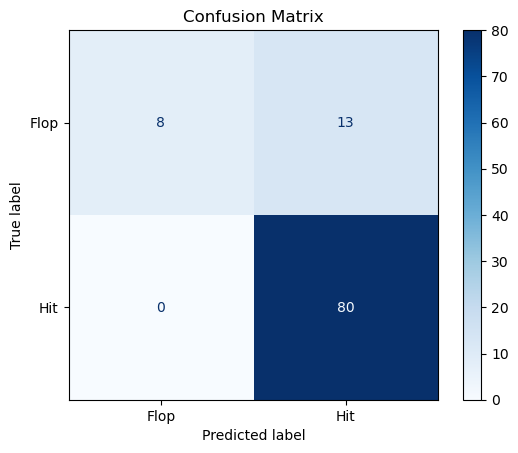

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Flop', 'Hit'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

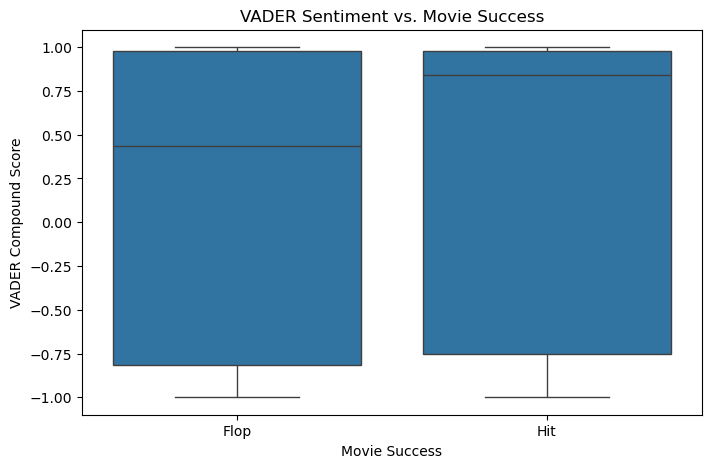

In [42]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='success', y='vader_score', data=merged_df)
plt.xticks([0, 1], ['Flop', 'Hit'])
plt.title('VADER Sentiment vs. Movie Success')
plt.xlabel('Movie Success')
plt.ylabel('VADER Compound Score')
plt.show()

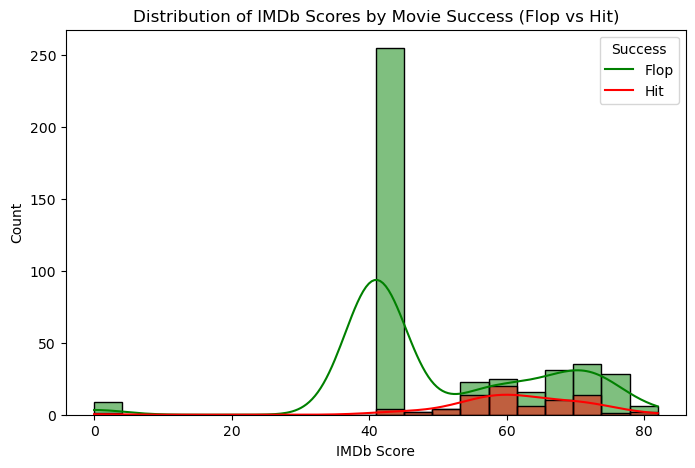

In [54]:
plt.figure(figsize=(8,5))
sns.histplot(data=merged_df, x='score', hue='success', kde=True, palette=['red', 'green'], bins=20)
plt.title('Distribution of IMDb Scores by Movie Success (Flop vs Hit)')
plt.xlabel('IMDb Score')
plt.ylabel('Count')
plt.legend(title='Success', labels=['Flop', 'Hit'])
plt.show()

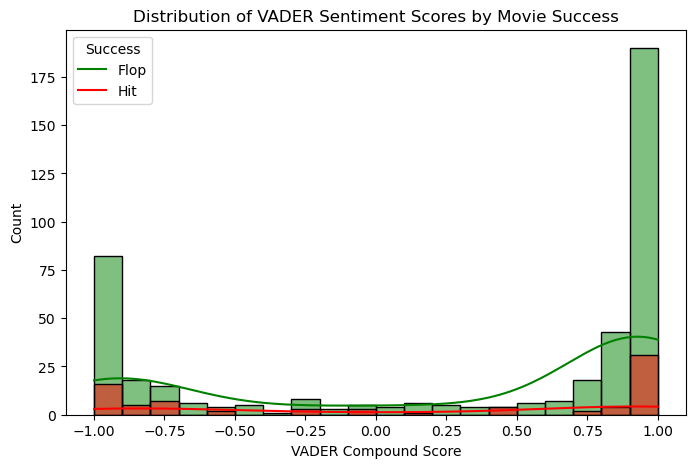

In [55]:
plt.figure(figsize=(8,5))
sns.histplot(data=merged_df, x='vader_score', hue='success', kde=True, palette=['red', 'green'], bins=20)
plt.title('Distribution of VADER Sentiment Scores by Movie Success')
plt.xlabel('VADER Compound Score')
plt.ylabel('Count')
plt.legend(title='Success', labels=['Flop', 'Hit'])
plt.show()


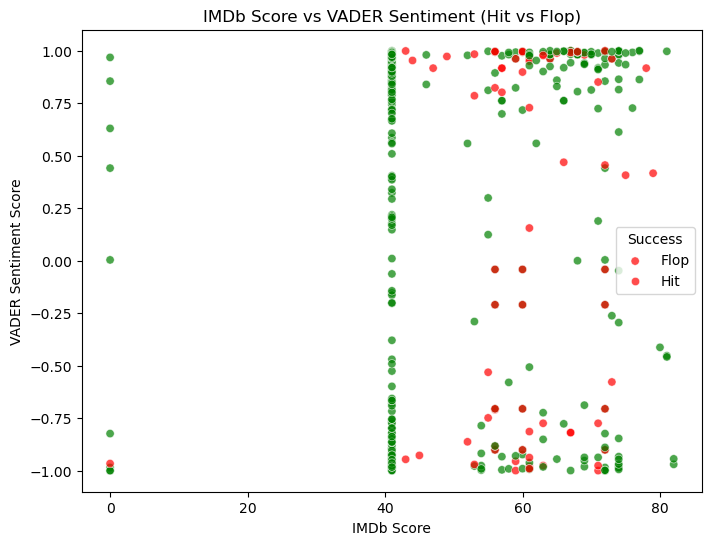

In [56]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_df, x='score', y='vader_score', hue='success', palette=['red', 'green'], alpha=0.7)
plt.title('IMDb Score vs VADER Sentiment (Hit vs Flop)')
plt.xlabel('IMDb Score')
plt.ylabel('VADER Sentiment Score')
plt.legend(title='Success', labels=['Flop', 'Hit'])
plt.show()


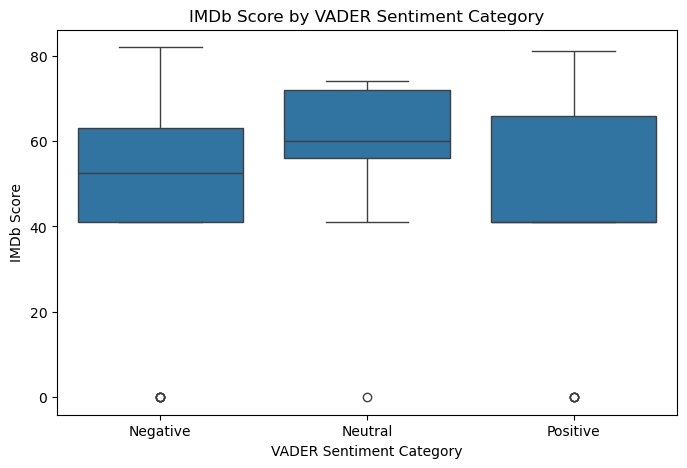

In [57]:
# Create sentiment bins
merged_df['vader_bin'] = pd.cut(merged_df['vader_score'], bins=[-1, -0.05, 0.05, 1], labels=['Negative', 'Neutral', 'Positive'])

plt.figure(figsize=(8,5))
sns.boxplot(x='vader_bin', y='score', data=merged_df, order=['Negative', 'Neutral', 'Positive'])
plt.title('IMDb Score by VADER Sentiment Category')
plt.xlabel('VADER Sentiment Category')
plt.ylabel('IMDb Score')
plt.show()


C:\Users\suraj\AppData\Local\Temp\ipykernel_6988\1312279570.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='title', data=top_movies, palette='viridis')


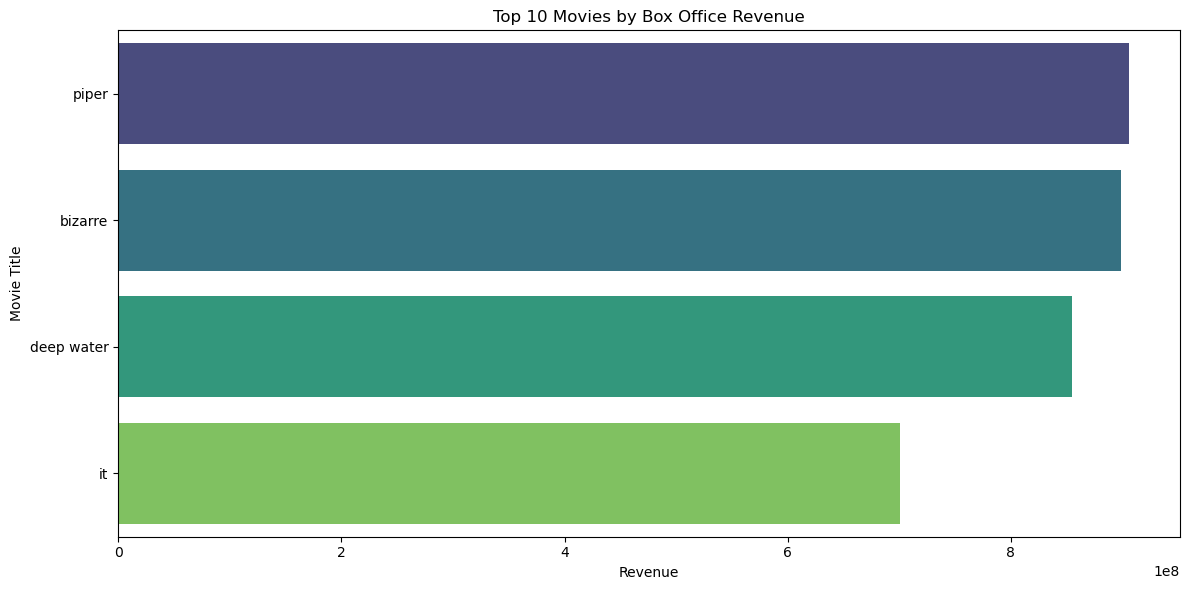

In [58]:
top_movies = merged_df[['title', 'revenue']].dropna().sort_values(by='revenue', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='revenue', y='title', data=top_movies, palette='viridis')
plt.title('Top 10 Movies by Box Office Revenue')
plt.xlabel('Revenue')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.show()


C:\Users\suraj\AppData\Local\Temp\ipykernel_6988\3716182238.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


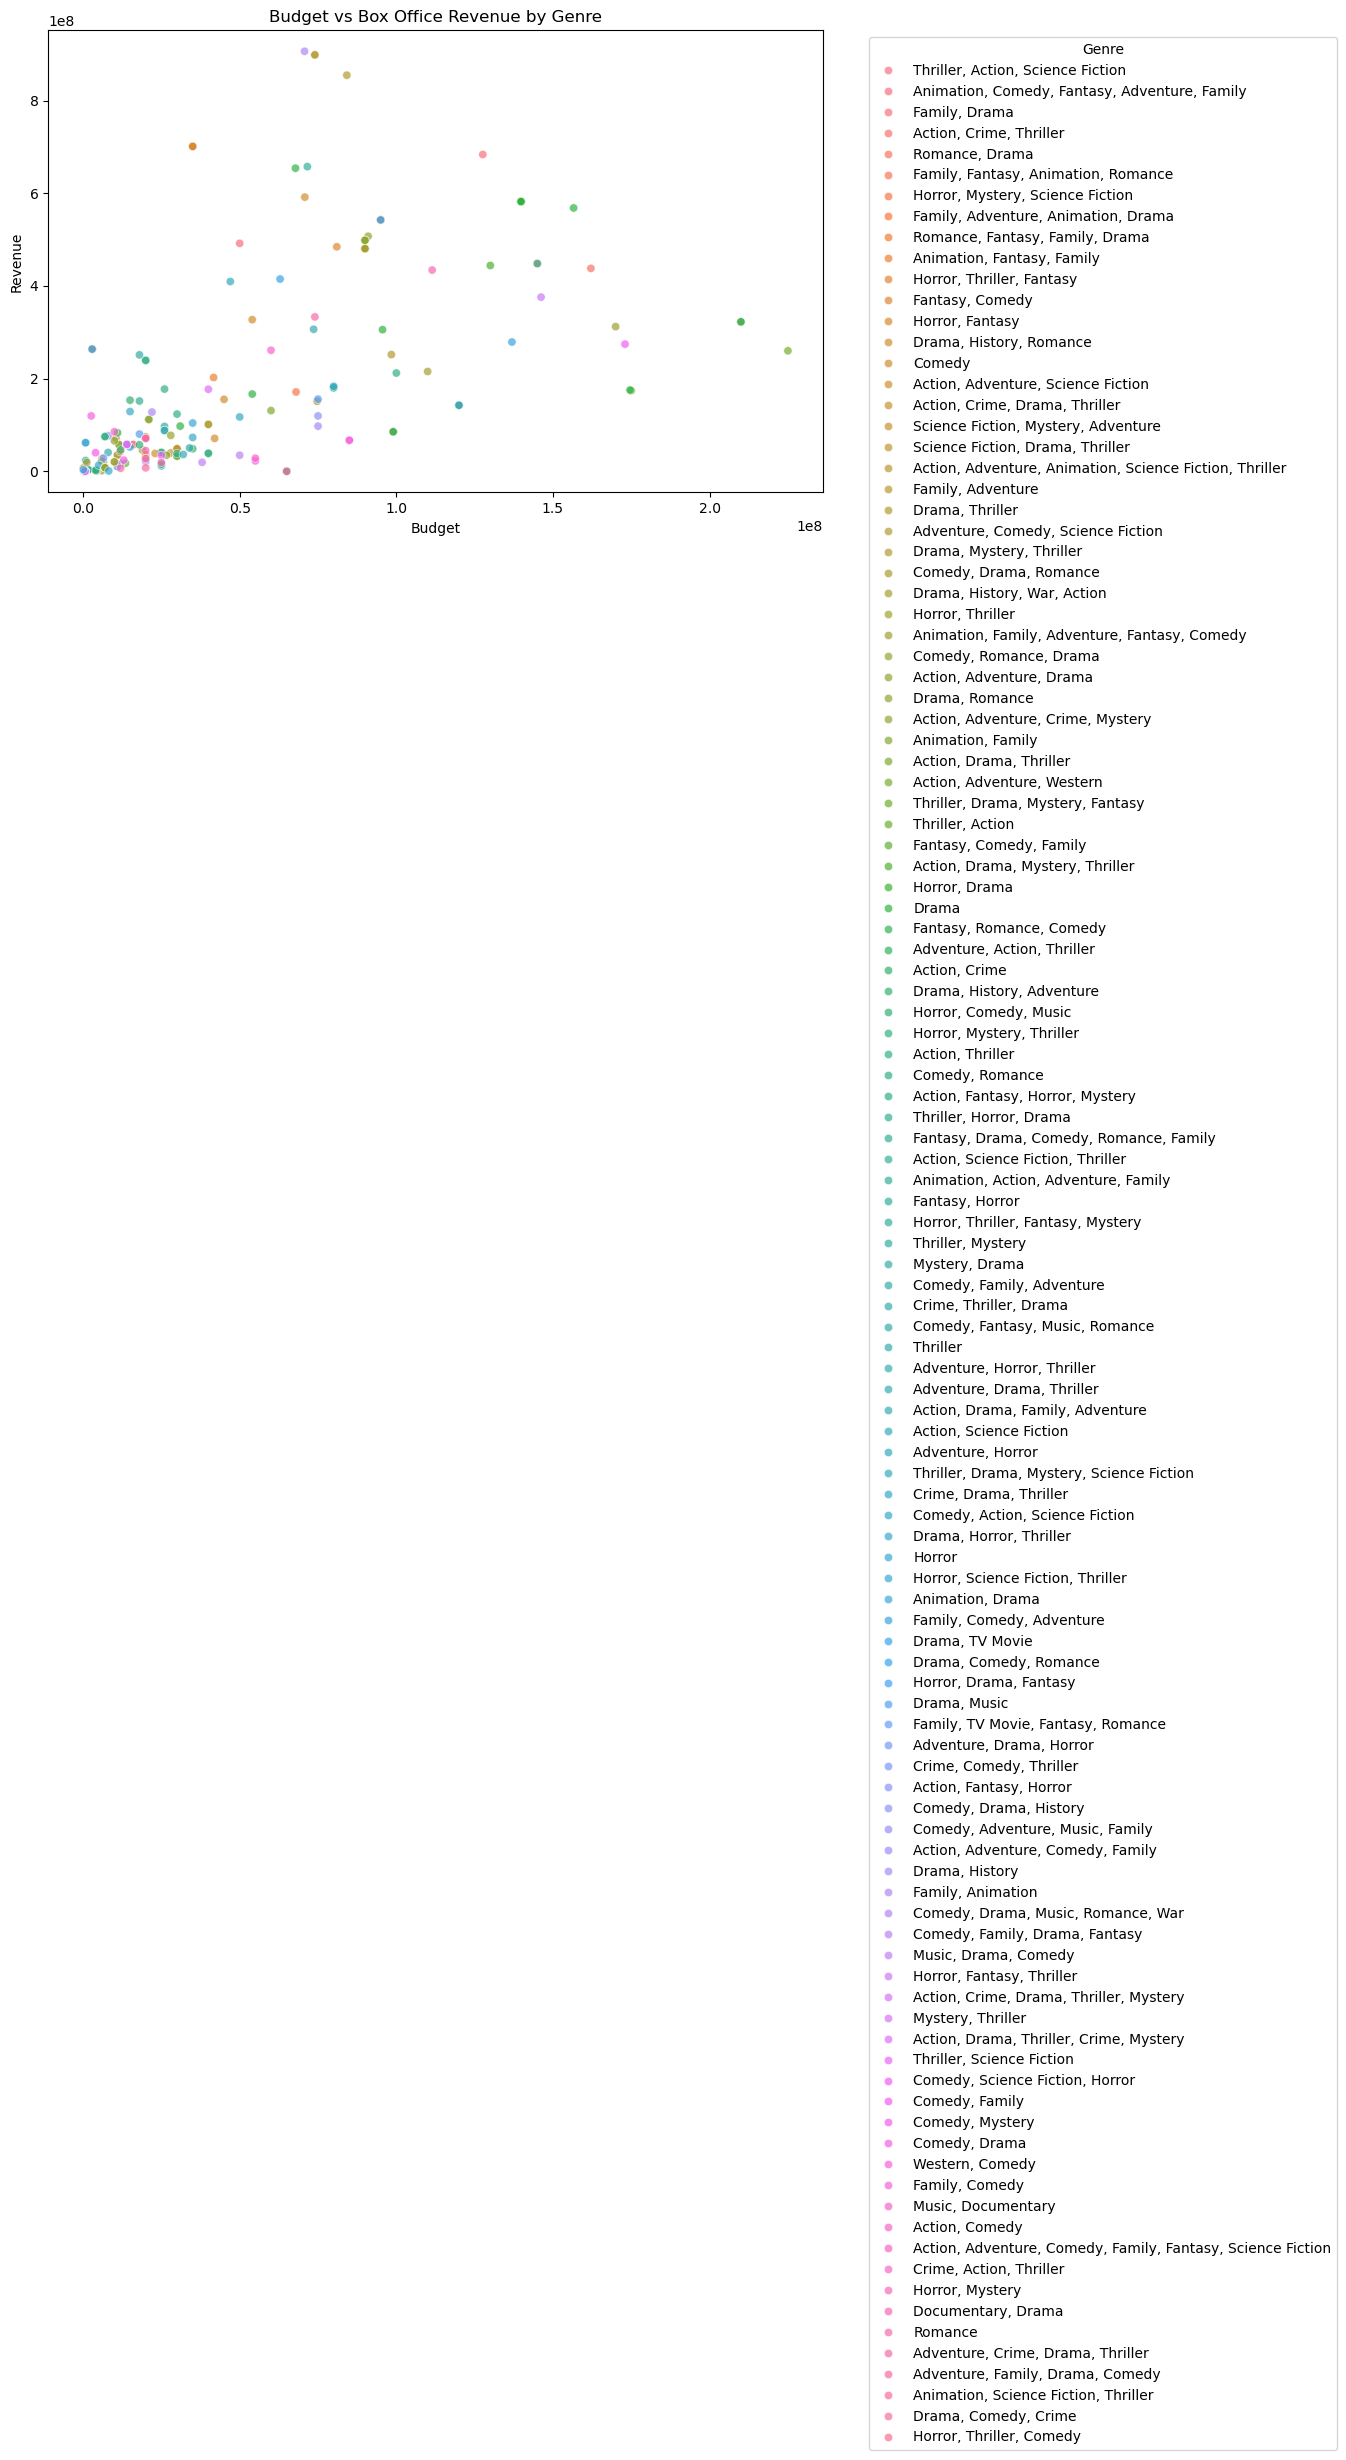

In [59]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='budget_x', y='revenue', hue='genre', alpha=0.7)
plt.title('Budget vs Box Office Revenue by Genre')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


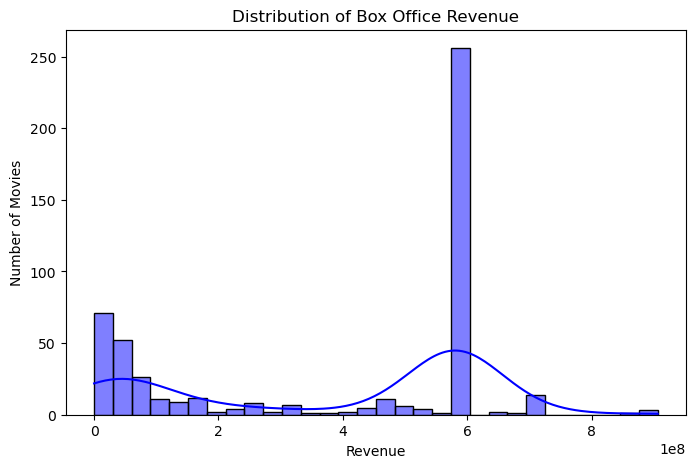

In [60]:
plt.figure(figsize=(8,5))
sns.histplot(merged_df['revenue'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution of Box Office Revenue')
plt.xlabel('Revenue')
plt.ylabel('Number of Movies')
plt.show()


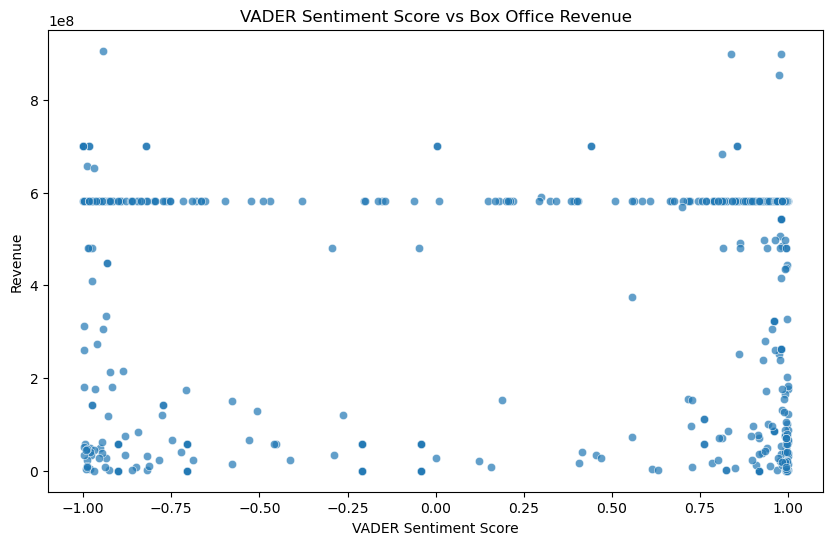

In [61]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='vader_score', y='revenue', alpha=0.7)
plt.title('VADER Sentiment Score vs Box Office Revenue')
plt.xlabel('VADER Sentiment Score')
plt.ylabel('Revenue')
plt.show()


C:\Users\suraj\AppData\Local\Temp\ipykernel_6988\53078157.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_revenue.values, y=country_revenue.index, palette='mako')


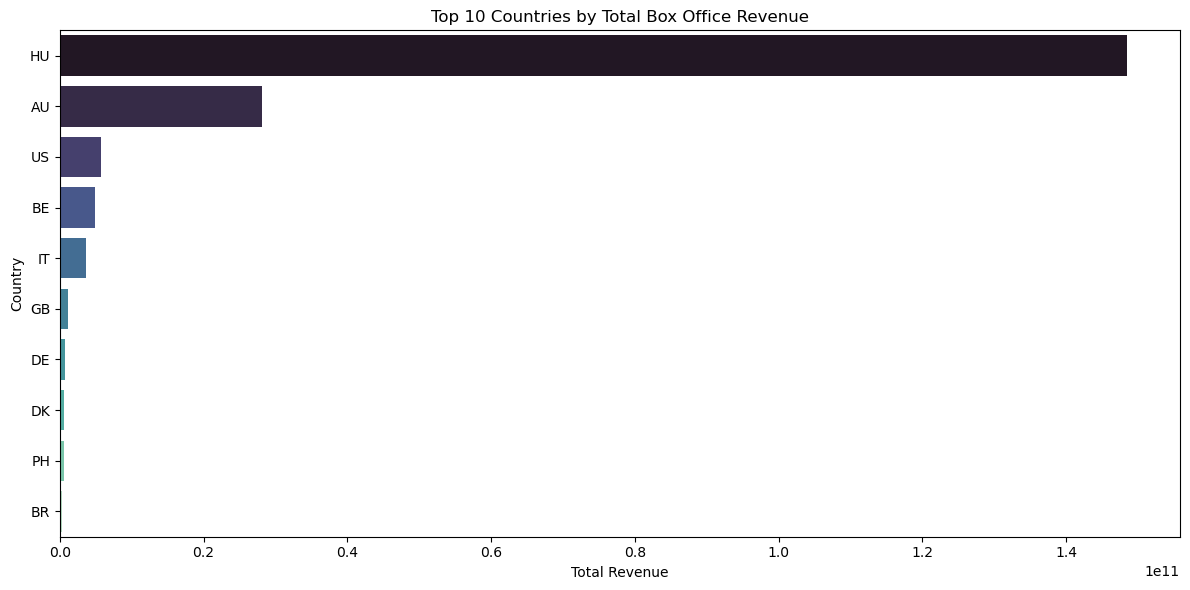

In [62]:
# Aggregate revenue by country
country_revenue = merged_df.groupby('country')['revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=country_revenue.values, y=country_revenue.index, palette='mako')
plt.title('Top 10 Countries by Total Box Office Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


C:\Users\suraj\AppData\Local\Temp\ipykernel_6988\726235189.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_revenue.values, y=genre_revenue.index, palette='rocket')


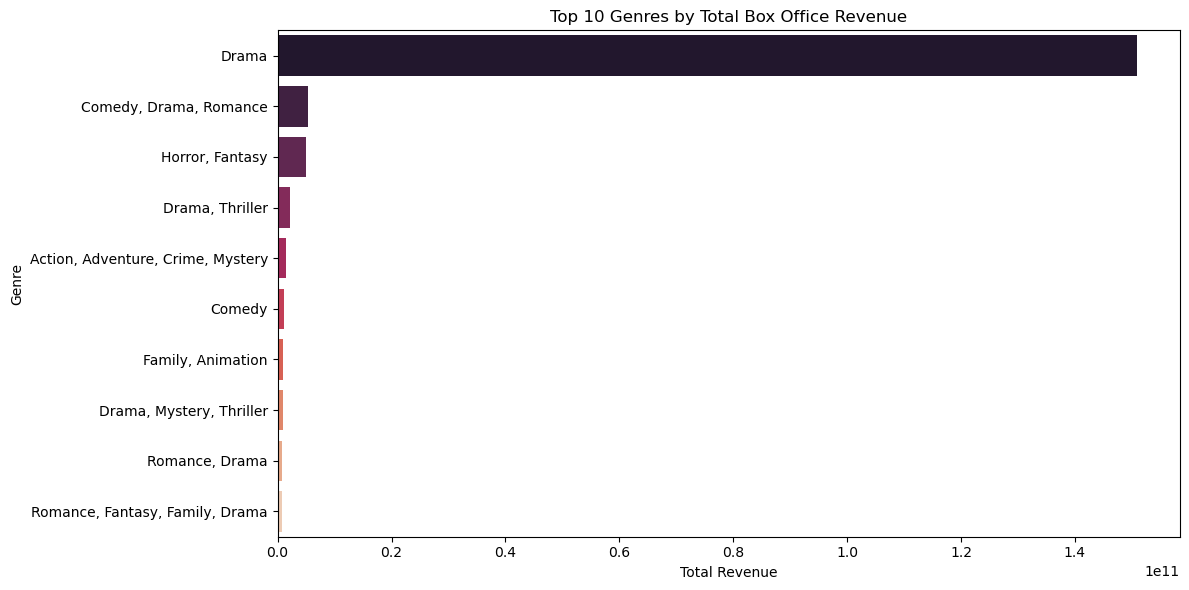

In [63]:
# Aggregate revenue by genre
genre_revenue = merged_df.groupby('genre')['revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=genre_revenue.values, y=genre_revenue.index, palette='rocket')
plt.title('Top 10 Genres by Total Box Office Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


C:\Users\suraj\AppData\Local\Temp\ipykernel_6988\2866043283.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_country_rev.values, y=avg_country_rev.index, palette='crest')


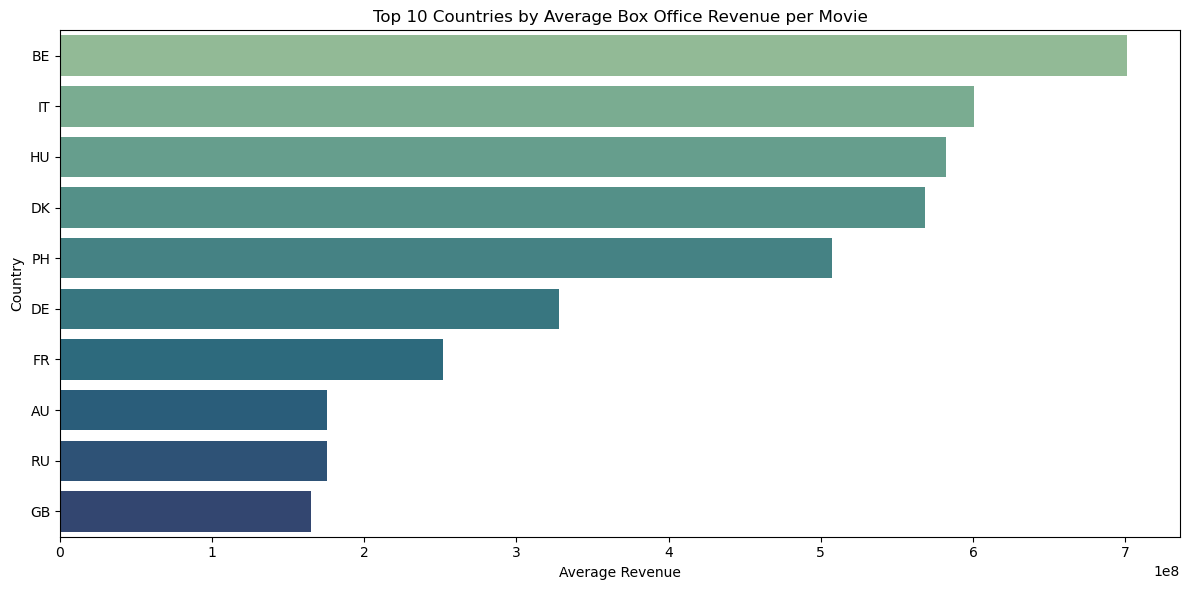

In [64]:
avg_country_rev = merged_df.groupby('country')['revenue'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_country_rev.values, y=avg_country_rev.index, palette='crest')
plt.title('Top 10 Countries by Average Box Office Revenue per Movie')
plt.xlabel('Average Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


C:\Users\suraj\AppData\Local\Temp\ipykernel_6988\2615387112.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_genre_rev.values, y=avg_genre_rev.index, palette='flare')


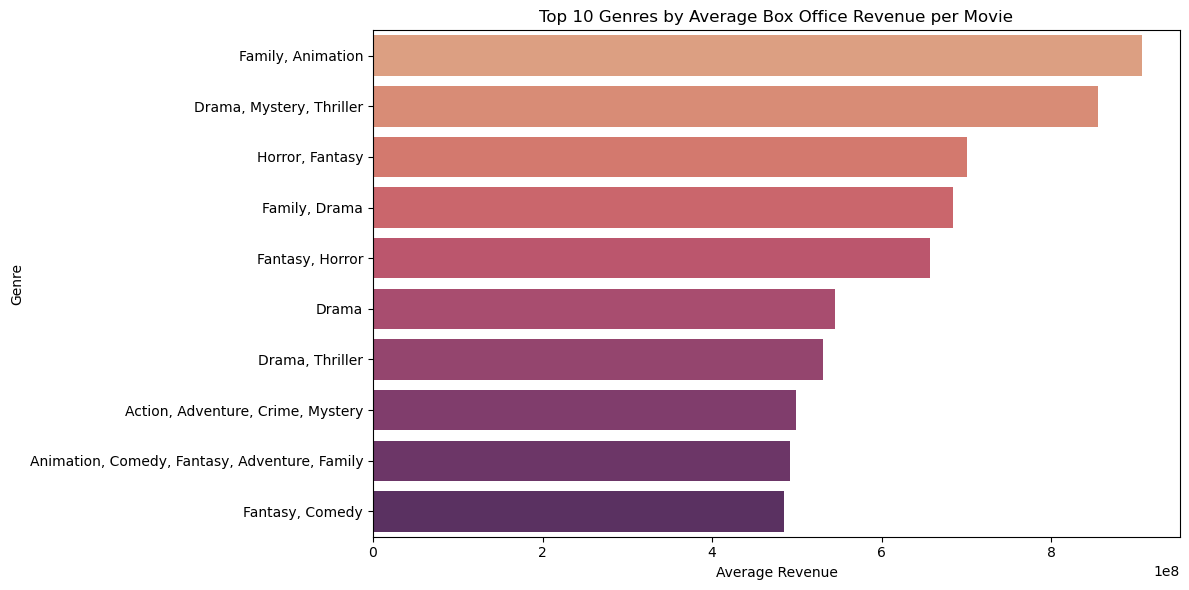

In [65]:
avg_genre_rev = merged_df.groupby('genre')['revenue'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_genre_rev.values, y=avg_genre_rev.index, palette='flare')
plt.title('Top 10 Genres by Average Box Office Revenue per Movie')
plt.xlabel('Average Revenue')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


C:\Users\suraj\AppData\Local\Temp\ipykernel_6988\1326148170.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_success.values, y=director_success.index, palette='coolwarm')


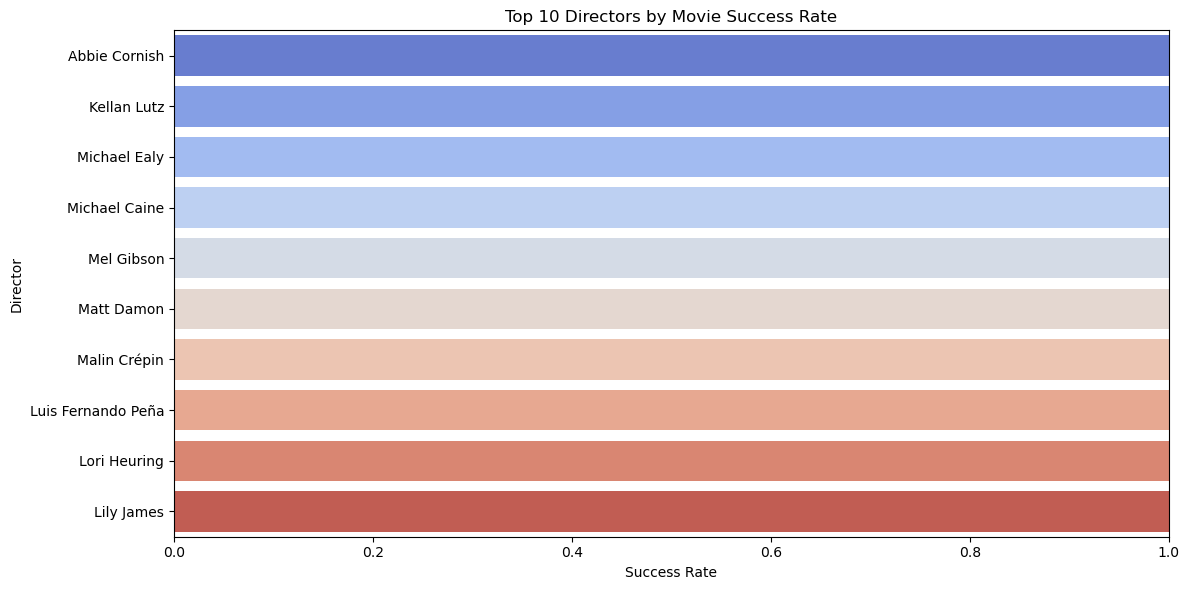

In [66]:
# Extract director (assuming 'crew' format includes director at the start, e.g. "Director Name, Actor1, Actor2,...")
merged_df['director'] = merged_df['crew'].str.split(',').str[0]

# Calculate success rate per director
director_success = merged_df.groupby('director')['success'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=director_success.values, y=director_success.index, palette='coolwarm')
plt.title('Top 10 Directors by Movie Success Rate')
plt.xlabel('Success Rate')
plt.ylabel('Director')
plt.xlim(0,1)
plt.tight_layout()
plt.show()


In [73]:
genres = merged_df['genre'].unique()

plt.figure(figsize=(15, 5 * len(genres)))

for i, g in enumerate(genres, 1):
    plt.subplot(len(genres), 1, i)
    genre_df = merged_df[merged_df['genre'] == g]
    
    scatter = plt.scatter(
        genre_df['review_count'],
        genre_df['vader_score'],
        s=genre_df['revenue'] / 1e6,  # scale revenue
        c=genre_df['success'],
        cmap='RdYlGn',
        alpha=0.6, edgecolors='w', linewidth=0.5
    )
    plt.colorbar(scatter, ticks=[0, 1], label='Success (0=Flop, 1=Hit)')
    plt.title(f'Popularity vs Sentiment vs Revenue for Genre: {g}')
    plt.xlabel('Number of Reviews')
    plt.ylabel('Average VADER Sentiment Score')
    plt.grid(True)
    
plt.tight_layout()
plt.show()


C:\Users\suraj\AppData\Local\Temp\ipykernel_6988\442399010.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


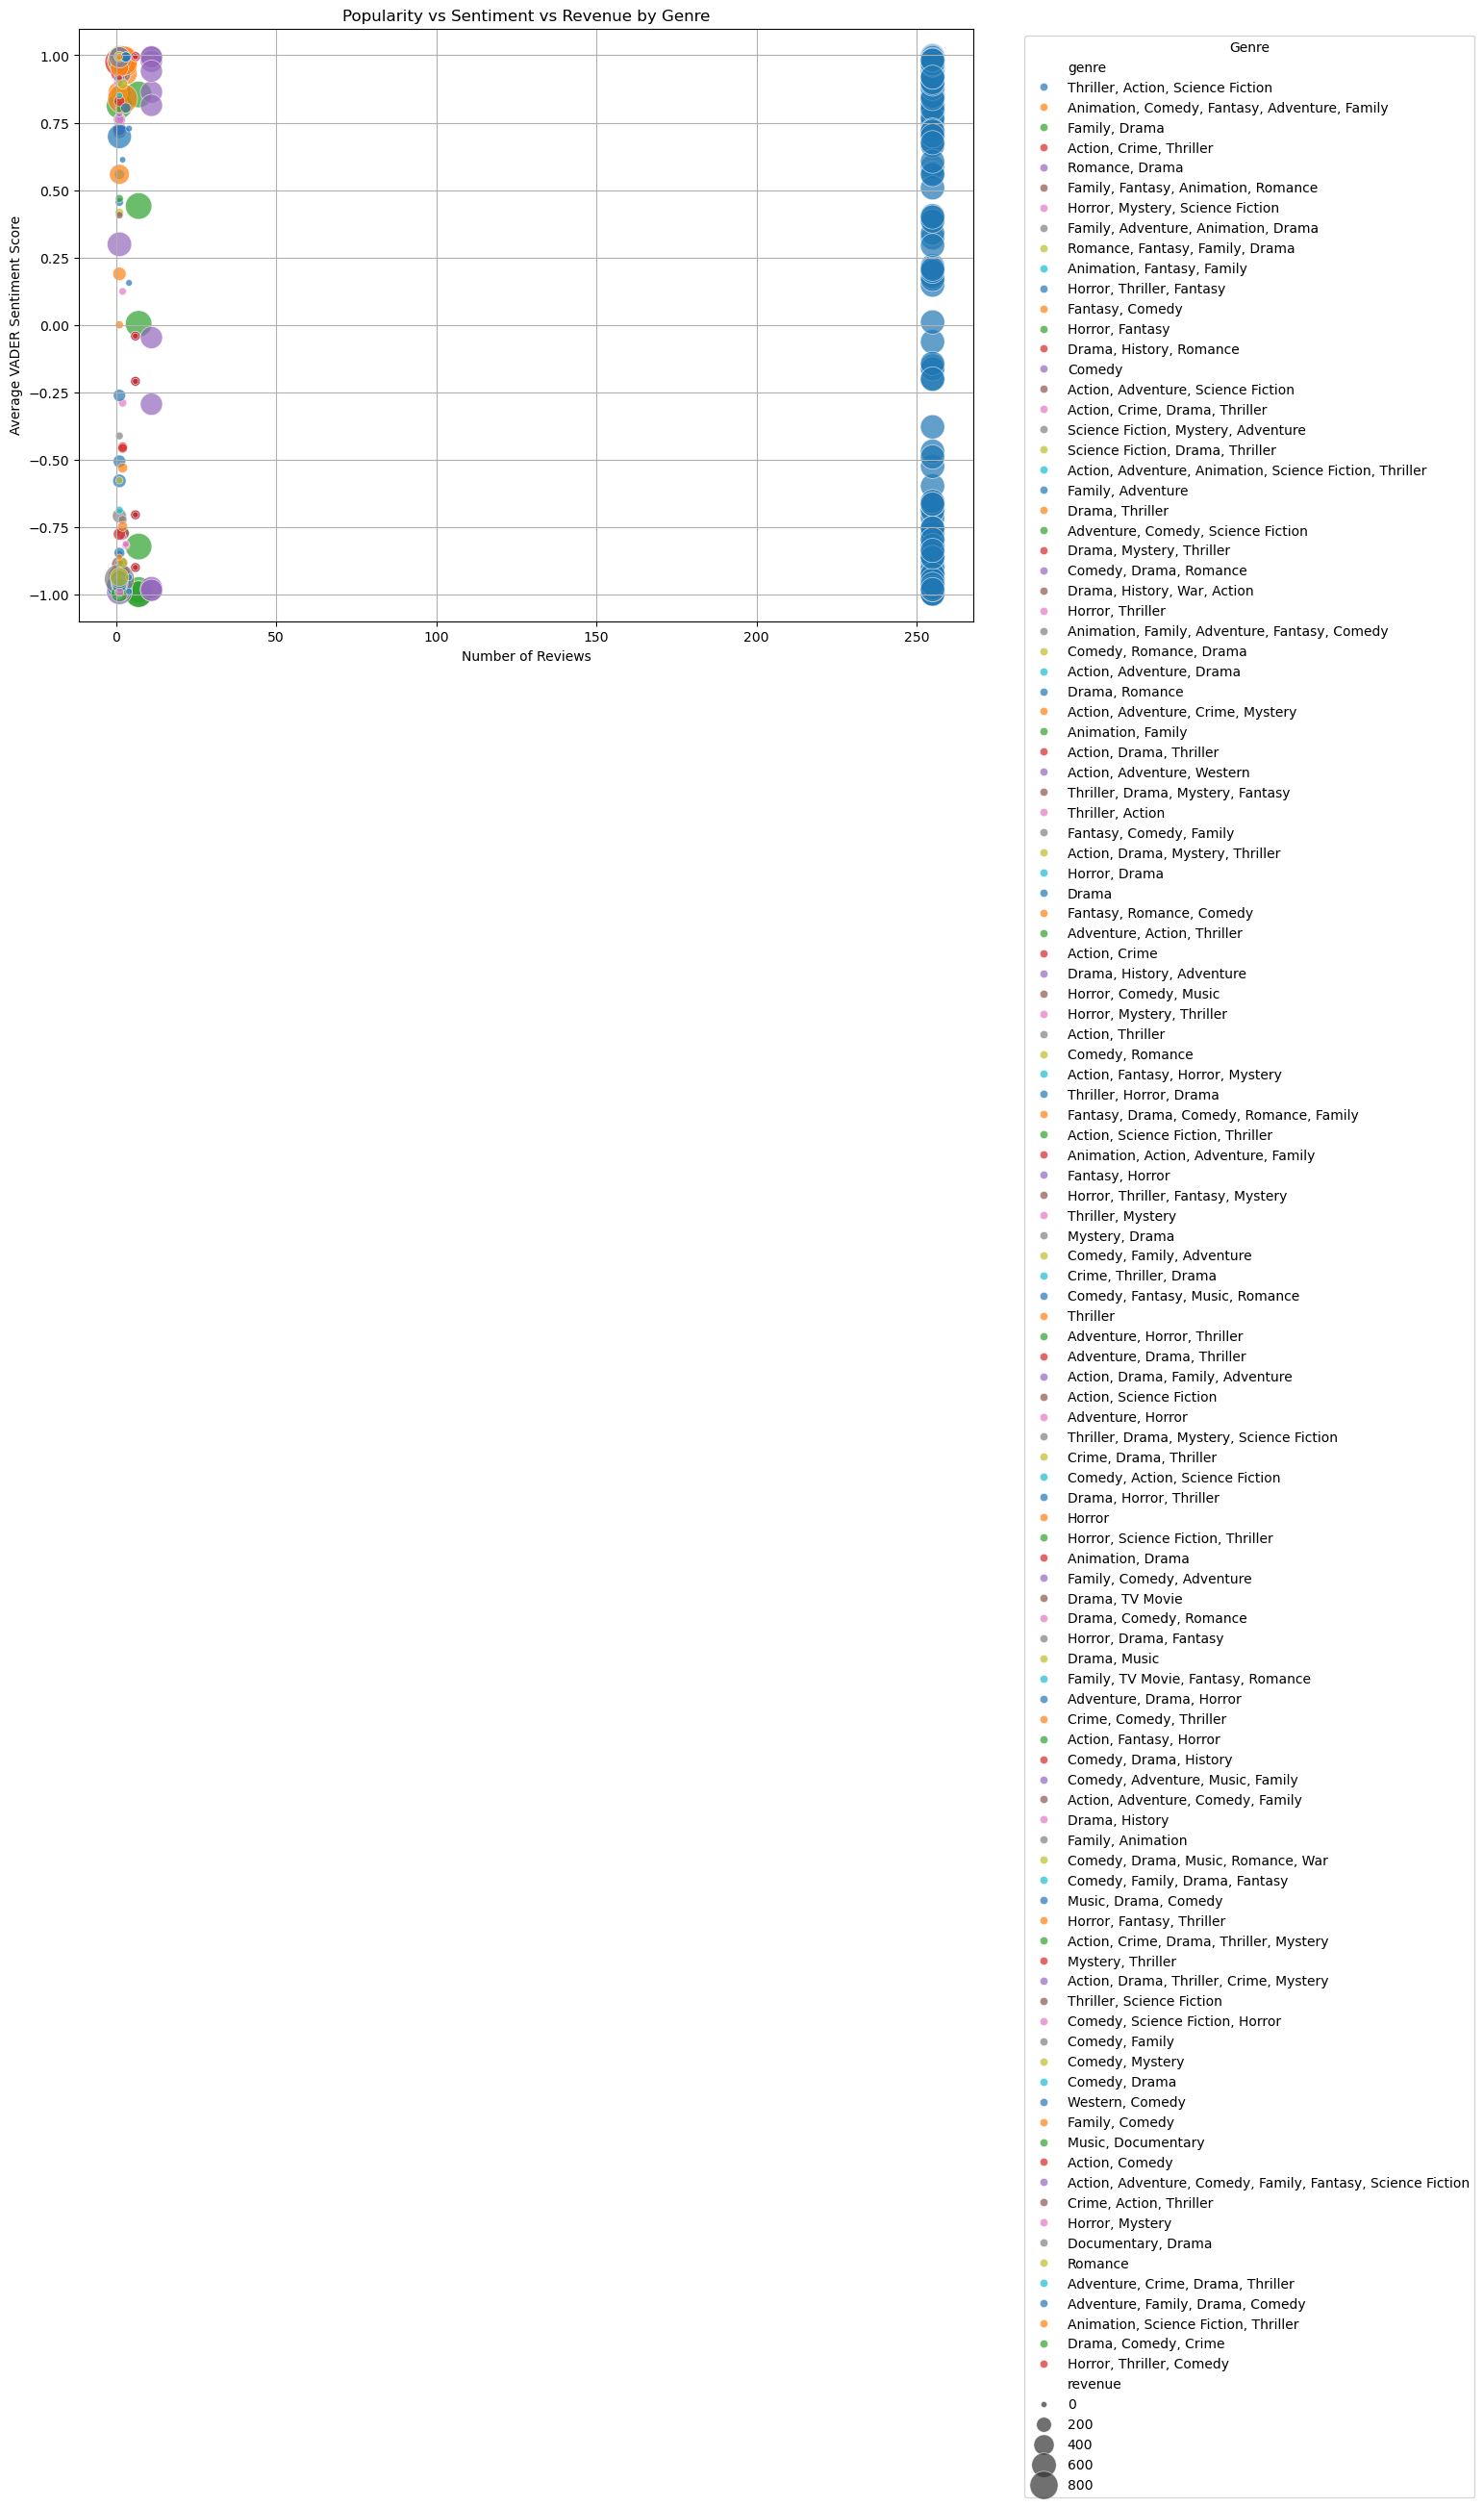

In [74]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.scatterplot(
    data=merged_df,
    x='review_count',
    y='vader_score',
    size=merged_df['revenue'] / 1e6,
    hue='genre',
    palette='tab10',
    alpha=0.7,
    sizes=(20, 500),
    edgecolor='w',
    linewidth=0.5
)

plt.title('Popularity vs Sentiment vs Revenue by Genre')
plt.xlabel('Number of Reviews')
plt.ylabel('Average VADER Sentiment Score')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
